In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
# from tensorflow.keras import layers,,Flatten
# from tensorflow.keras import layers,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense,Flatten
from keras.applications.imagenet_utils import preprocess_input

In [2]:
import pathlib


data_dir="DataSet_Create_Train/";
data_dir = pathlib.Path(data_dir)

In [3]:

print(data_dir)
# rose=list(data_dir.glob("Real/*"))
# print (rose)
# PIL.Image.open(str(rose[1]))

DataSet_Create_Train


In [ ]:
# y2=[]
# for label in test:
#     y2.append(label)

In [4]:
img_height,img_width=180,180
batch_size=256

train_ds= tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size);

classes = train_ds.class_names
# testClasses = testData.class_names

print(classes);



Found 21967 files belonging to 2 classes.
Using 17574 files for training.
['Fake', 'Real']


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 21967 files belonging to 2 classes.
Using 4393 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Fake', 'Real']


In [7]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [8]:
# resnet_model.summary()
stringlist = []
resnet_model.summary(print_fn=lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)
print(short_model_summary)
# print(resnet_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
resnet_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [9]:
epochs = 2
history = resnet_model.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=epochs)
    


print (history.history)

Epoch 1/2


c:\Users\win10\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


69/69 [==============================] - 1042s 15s/step - loss: 0.0447 - accuracy: 0.9892 - val_loss: 0.0057 - val_accuracy: 0.9989
Epoch 2/2
69/69 [==============================] - 968s 14s/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 3.3545e-04 - val_accuracy: 1.0000
{'loss': [0.044726818799972534, 0.0012447750195860863], 'accuracy': [0.989188551902771, 0.9997723698616028], 'val_loss': [0.0057160514406859875, 0.0003354507207404822], 'val_accuracy': [0.9988618493080139, 1.0]}


In [19]:

from keras.models import model_from_json

# with open("database/model_arch.json") as f:
#     lines = f.readlines()
    
resnet_model.save_weights("database/my_model_weights.h5")
np.save('database/history.npy',history.history)



AttributeError: 'dict' object has no attribute 'history'

In [20]:


history1=np.load('database/history.npy',allow_pickle='TRUE').item()
resnet_model.load_weights('database/my_model_weights.h5')
# from keras.models import model_from_json

# with open("database/model_arch.json") as f:
#     lines = f.readlines()

# model = model_from_json(lines[0])
print(history1)

FileNotFoundError: [Errno 2] No such file or directory: 'database/history.npy'

In [101]:
# from keras.models import model_from_json

# with open("database/model_arch.json") as f:
#     lines = f.readlines()

# model = model_from_json(lines[0])
# resnet_model.load_weights('database/my_model_weights.h5')




None


In [103]:
# print(model)
# print(history)

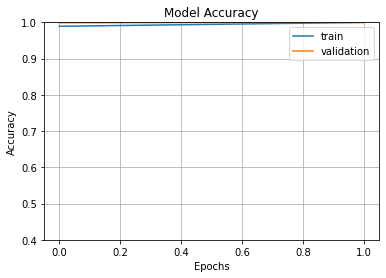

In [15]:
history=np.load('database/history.npy',allow_pickle='TRUE').item()
# print (history.history)
fig1 = plt.gcf()
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('database/accuracy.png')
plt.show()



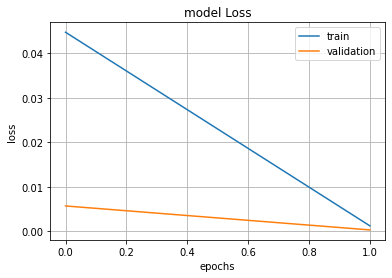

In [16]:


plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.grid()
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.savefig('database/model_loss.png')
plt.show()

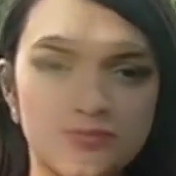

In [18]:
import cv2
file="001_870_Frame_59.png"
# print (rose[0])

# file=str(rose[1])
image=cv2.imread(file)

image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
# print(image.shape)

PIL.Image.open(file)

{'loss': [0.890921413898468], 'accuracy': [0.814029335975647], 'val_loss': [0.5507893562316895], 'val_accuracy': [0.8529411554336548]}


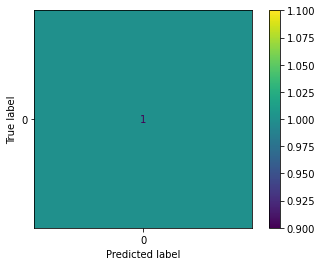

In [24]:
# print(history.history);
# val_loss        = history.history['val_accuracy']
# val_accuracy    = history.history['loss']

# index=0
# for i in val_accuracy:
#     val_accuracy[index]=round(i)
#     index=index+1

# index=0
# for a in val_loss:
#     val_loss[index]=round(a)
#     index=index+1



# from sklearn.metrics import confusion_matrix
# from sklearn import metrics
# y_actu = val_loss
# y_pred = val_accuracy


# confusion_matrix(y_actu, y_pred)

# confusion_matrix = metrics.confusion_matrix(y_actu, y_pred)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

# cm_display.plot()
# plt.show()

In [15]:
pred=resnet_model.predict(image)
# resnet_model.save(args["model"], save_format="h5")
# print(np.argmax(pred))
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

1/1 [==============================] - 4s 4s/step
The predicted class is Fake
